In [1]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
from src.loaders import load_data, load_labels
from src.classify import MCM_Classifier
import os
import src.plot as myplot


In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/bin/../src/plot.py'>

In [3]:
# Customizable environment variables
n_categories = 10  # Number of categories to be classified
n_variables = 121  # Number of variables in the dataset
mcm_filename_format = "train-images-unlabeled-{}_comms.dat"
data_filename_format = "train-images-unlabeled-{}.dat"
data_path = "../INPUT/data/"
communities_path = "../INPUT/MCMs/"
output_path = "../OUTPUT/"

In [4]:
print("{:-^50}".format("  MCM-Classifier  ")) 

test_data = load_data("../INPUT/data/test-images-unlabeled-all-uniform.txt").astype(int)
test_labels = load_labels("../INPUT/data/test-labels-uniform.txt").astype(int)

# Step 1: Initialize classifier
classifier = MCM_Classifier(n_categories, n_variables, mcm_filename_format, data_filename_format, data_path, communities_path)

# Step 2: Train
classifier.fit(greedy=True, max_iter=1000000, max_no_improvement=100000)


# Step 3: Evaluate
predicted_classes, probs = classifier.predict(test_data, test_labels)

# Step 4: Save classification report and other stats
# report = classifier.get_classification_report(test_labels)
classifier.save_classification_report(test_labels,path=output_path)

if (classifier.stats == None):
    raise Exception("Classifier stats not found. Did you forget to call predict()?")


----------------  MCM-Classifier  ----------------
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
Generating bootstrap samples...
Done!
--------------------------------------------------
--  Running MinCompSpin_SimulatedAnnealing...  ---
--------------------------------------------------

✓ SAA for train-images-unlabeled-0_bootstrap finished successfully
✓ SAA for train-images-unlabeled-1_bootstrap finished successfully
✓ SAA for train-images-unlabeled-2_bootstrap finished successfully
✓ SAA for train-images-unlabeled-3_bootstrap finished successfully
✓ SAA for train-images-unlabeled-4_bootstrap finished successfully
✓ SAA for train-images-unlabeled-5_bootstrap finished successfully
✓ SAA for tra

In [18]:
Ps = classifier.get_P() # category, icc in MCM, 2**rank_icc probability distribution
MCMs = classifier.get_MCMs()
Counts = classifier.get_Counts()
N = Counts[0][0].sum().astype(int) 

In [34]:
MCMs[0]

array(['1000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
       '0000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001',
       '0000000000000000000000000000000000000000010000000001110000000011100000000101000000000000000000000000000000000000000000000',
       '0000000000000000000000000000000000000000000010000000000100000000001000000000010000000000000000000000000000000000000000000',
       '0001100000001100000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
       '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001111100000001110000',
       '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000001000000000',
       '00000000000000000000000000000000000000000000000000000000000000000000

In [26]:
MCMs[0][0]
def rank_icc(icc:str):
    """Get the rank of an icc given its string representation."""

    return icc.count("1")


In [33]:
import math
mcm_idx = 0

import numpy as np
import math

def evidence_iccs(Counts, MCMs, mcm_idx):
    """Calculate the evidence for each icc in an MCM.
      Return an array of evidences. The sum of that array is the MCM evidence.

    :param Counts: Return value of classifier.get_Counts(). Unormalized probability distribution for all MCM for all ICC.  
    :type Counts: np.ndarray of shape[category,icc,possible_states]
    :param MCMs: Return value of classifier.get_MCMs(). MCMs for all categories.
    :type MCMs: np.ndarray of shape[category,icc] of binary strings.
    :param mcm_idx: which mcm to calculate the evidence for.
    :type mcm_idx: int < #categories
    :return: np.ndarray of evidences for each icc. ICC are identified by index
    :rtype: np.ndarray of shape [icc_evidences]
    """
    N = Counts[0][0].sum().astype(int) 
    count_mcm = Counts[mcm_idx]
    evidence = np.zeros(len(count_mcm))
    log_sqrt_pi = math.log(math.sqrt(math.pi))
    for idx, icc in enumerate(count_mcm):
        rank = rank_icc(MCMs[mcm_idx][idx])
        evidence[idx] += math.lgamma(2**(rank-1)) - math.lgamma(N + 2**(rank-1)) # middle part of equation 8 in Mulatier_2020
        for pattern in Counts[mcm_idx][idx]: # last part of equation 8
            evidence[idx] += math.lgamma(pattern+.5) - log_sqrt_pi
    return evidence

evidence_iccs(Counts,MCMs,2)


array([-27340.10928365, -13326.30371767,    -40.24539169,   -969.8554934 ,
        -5300.58629578,  -6795.89218441, -22608.84491615, -13260.52032613,
       -11931.63392645, -16013.12903756, -16127.35596855,  -1330.31380333,
         -311.90070708,   -266.91418708, -27357.76908427,   -153.12492052,
       -10132.72831215,   -772.94381614, -26492.79823345, -20897.53823688,
          -51.36849937])

array([   -40.25,    -40.25, -21498.41,  -2067.44,  -1904.82, -18472.8 ,
         -606.68, -25038.67,  -4460.53,   -101.76,  -6364.92, -20292.4 ,
       -18518.82,    -41.34, -13115.23, -19985.99, -13372.27,  -1188.77,
          -71.13,    -57.22, -18145.64, -22682.12])

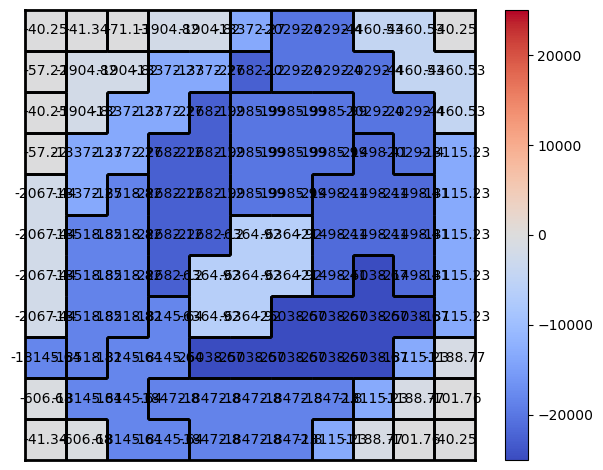

In [37]:
mcm_idx = 0
comms = myplot.generate_icc_comms_map(MCMs[mcm_idx])
evd = evidence_iccs(Counts,MCMs,mcm_idx)


plt.figure()

val_matrix = evd[comms].round(2)

myplot.partition_map(plt.gca(),val_matrix,val_matrix,myplot.find_borders(comms),drawing_cond=lambda x: x!=0)                        
plt.tight_layout()
plt.show()

In [21]:
mi_matrix = (P0[comms0])

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
myplot.partition_map(plt.gca(),mi_matrix,mi_matrix,borders,drawing_cond=drawing_cond)  